# 寻找最优参数C，gamma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.svm import SVC

In [3]:
mat = sio.loadmat('E:/ML_NG/6-SVM/data/ex6data3.mat')
X,y = mat['X'],mat['y']
Xval,yval = mat['Xval'],mat['yval']

In [4]:
def plot_data():
   plt.scatter(X[:,0],X[:,1],c = y.flatten(),cmap = 'jet')
   plt.xlabel('x1')
   plt.ylabel('y')

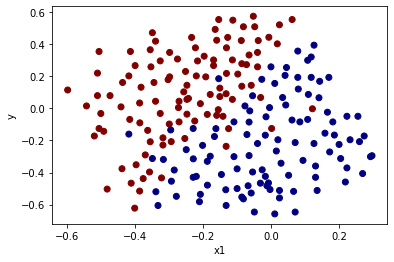

In [5]:
plot_data()

In [6]:
Cvalues = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100] #9
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100] #9

In [14]:
best_score= 0
best_params = (0,0)

for c in Cvalues:
    for gamma in gammas:
        svc = SVC(C=1,kernel='rbf',gamma=gamma)
        svc.fit(X,y.flatten())
        score = svc.score(Xval,yval.flatten())
        if score > best_score:
            best_score = score
            best_params = (c,gamma)
print(best_score,best_params)

0.965 (0.01, 100)


In [15]:
svc2 = SVC(C=0.01,kernel='rbf',gamma=100)
svc2.fit(X,y.flatten())

SVC(C=0.01, gamma=100)

In [16]:
def plot_boundary(model):
    x_min,x_max = -0.6,0.4
    y_min,y_max = -0.7,0.6
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
                        
                        
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

e:\python\lib\site-packages\ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


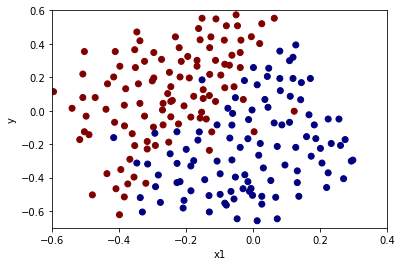

In [17]:
plot_boundary(svc2)
plot_data()